In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
os.chdir('/Users/garcgabe/Downloads/side work')

In [3]:
df = pd.read_csv("StockX-Data-Contest-2019-3.csv")
df.head(10)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
5,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$798,$220,2/11/17,8.5,Michigan
6,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,$784,$220,12/17/16,11.0,California
7,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$460,$220,4/29/17,10.0,New York
8,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11.0,Kansas
9,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11.0,Florida


## StockX Sales Data Analysis
### For Yeezy and Nike Off-White Releases

**StockX Data Description**

The data  consists of a random sample of all Off-White x Nike and Yeezy 350 sales from between 9/1/2017 (the month that Off-White first debuted “The Ten” collection) and the present. There are 99,956 total sales in the data set; 27,794 Off-White sales, and 72,162 Yeezy sales. The sample consists of U.S. sales only.

To create this sample, we took a random, fixed percentage of StockX sales (X%) for each colorway, on each day, since September 2017. So, for each day the Off-White Jordan 1 was on the market, we randomly selected X% of its sale from each day. (It’s not important to know what X is; all that matters is that it’s a random sample, and that the same fixed X% of sales was selected from every day, for every sneaker).

To create this sample, we took a random, fixed percentage of StockX sales (X%) for each colorway, on each day, since September 2017. So, for each day the Off-White Jordan 1 was on the market, we randomly selected X% of its sale from each day. (It’s not important to know what X is; all that matters is that it’s a random sample, and that the same fixed X% of sales was selected from every day, for every sneaker).

We’ve included 8 variables for you to work with: Order Date, Brand, Sneaker Name, Sale Price, Retail Price, Release Date, Shoe Size, and Buyer State (the U.S. state the buyer shipped to). You can use whatever variables you want in the analysis; you can use 1 variable, or you can use all 8. And remember, every row in the spreadsheet represents an individual StockX sale. There are no averages or order counts; this is just a random sample of daily sales data.





#### Possible questions to investigate, assuming the seller bought at retail:

###### 1. Which brand has the highest profit margin? 

###### 2. Which shoe has the highest profit margin?

###### 3. Which state/region bought the most sneakers?

###### 4. What is the distribution of shoe sizes? 

###### 5. What is the most expensive shoe?

###### 6. What shoes are most popular?

I don't plan to fully address each question, however I'll let these guide me in the analysis process. 


In [4]:
## Data set length of about 100,000 entries - all dtypes are objects except shoe size
## Need to change: dollars to integers

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [5]:
# Changing Sale Price and Retail Price to integers

sale_price_int = []
for x in df['Sale Price']:
    sale_price_int.append(x.replace("$","").replace(",",""))
    
retail_price_int = []
for y in df['Retail Price']:
    retail_price_int.append(y.replace("$","").replace(",",""))

In [6]:
# Replace numpy arrays in Pandas DataFrame
df['Sale Price'] = sale_price_int
df['Sale Price'] = df['Sale Price'].astype(str).astype(int)

df['Retail Price'] = retail_price_int
df['Retail Price'] = df['Retail Price'].astype(str).astype(int)

In [7]:
## Prices are now integers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  int64  
 4   Retail Price  99956 non-null  int64  
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.1+ MB


In [8]:
# basic stats of Retail Price
df['Retail Price'].describe()

count    99956.00000
mean       208.61359
std         25.20001
min        130.00000
25%        220.00000
50%        220.00000
75%        220.00000
max        250.00000
Name: Retail Price, dtype: float64

In [9]:
df['Retail Price'].value_counts()

220    71707
190     7095
160     6361
170     5471
130     3622
250     3429
200     2240
150       31
Name: Retail Price, dtype: int64

In [10]:
# Had suspicion that Yeezy always priced at $220
df[df['Brand']==' Yeezy']['Retail Price'].value_counts()

220    71707
200      455
Name: Retail Price, dtype: int64

In [11]:
df[df['Brand']=='Off-White']['Retail Price'].value_counts()

190    7095
160    6361
170    5471
130    3622
250    3429
200    1785
150      31
Name: Retail Price, dtype: int64

As is expected with the data set (since it's a reseller marketplace) - most shoes share a retail price

As shown in cells above - about 72% of shoes are sold at $220 - all of these being Yeezy's. The Off-White's retailed for different prices. 

In [12]:
# Seeing most commonly resold amounts
# Fairly distributed since N is almost 100,000
df['Sale Price'].value_counts()[0:10]

270    1641
260    1523
275    1349
250    1287
280    1270
265    1238
240    1208
400    1046
300    1017
380     953
Name: Sale Price, dtype: int64

In [13]:
# Number of sales that were less than $400
df[df['Sale Price']<400]['Sale Price'].value_counts().sum()

59016

In [14]:
df['Sale Price'].describe()

count    99956.000000
mean       446.634719
std        255.982969
min        186.000000
25%        275.000000
50%        370.000000
75%        540.000000
max       4050.000000
Name: Sale Price, dtype: float64

**It seems that there's a wide distribution of Sale Prices based on the value counts and descriptive stats. The standard deviation of 256 when the mean is 446 is of note - likely drawn up from the extremely high sale prices therefore showing a large right tail.**

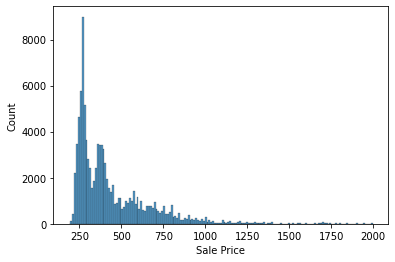

In [16]:
sns.histplot(df[df['Sale Price']<2000]['Sale Price']);

In [17]:
avg_sale_price = pd.DataFrame(df.groupby('Sneaker Name')['Sale Price'].mean())
avg_retail_price = pd.DataFrame(df.groupby('Sneaker Name')['Retail Price'].mean())
avg_sale_retail = pd.concat([avg_sale_price, avg_retail_price], axis=1)

In [18]:
avg_retail_price

,Retail Price
Sneaker Name,
Adidas-Yeezy-Boost-350-Low-Moonrock,200.0
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,200.0
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,200.0
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,200.0
Adidas-Yeezy-Boost-350-Low-Turtledove,200.0
Adidas-Yeezy-Boost-350-Low-V2-Beluga,220.0
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,220.0
Adidas-Yeezy-Boost-350-V2-Blue-Tint,220.0
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,220.0


In [19]:
avg_sale_retail.sort_values("Sale Price", ascending=False)

,Sale Price,Retail Price
Sneaker Name,,
Air-Jordan-1-Retro-High-Off-White-White,1826.070288,190.0
Air-Jordan-1-Retro-High-Off-White-Chicago,1769.800000,190.0
Adidas-Yeezy-Boost-350-Low-Turtledove,1531.661765,200.0
Nike-Air-Presto-Off-White,1236.055369,160.0
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,1011.514286,200.0
Adidas-Yeezy-Boost-350-Low-Moonrock,996.710000,200.0
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,984.237705,200.0
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100,975.516129,150.0
Adidas-Yeezy-Boost-350-V2-Core-Black-Red,937.754967,220.0


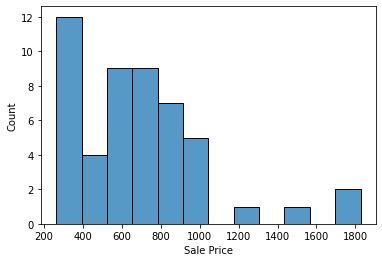

In [20]:
sns.histplot(avg_sale_retail['Sale Price'], bins=12);

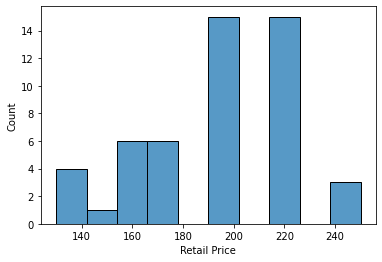

In [21]:
sns.histplot(avg_sale_retail['Retail Price'], bins=10);

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


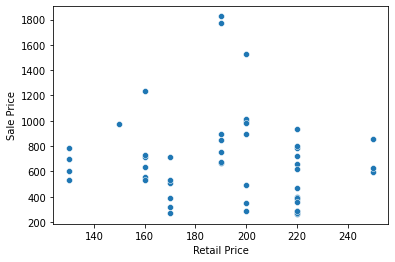

In [22]:
sns.scatterplot('Retail Price', 'Sale Price', data=avg_sale_retail);

In [23]:
## Unique brands appear to only be Yeezy and Off-White, or Adidas and Nike
df['Brand'].unique()

array([' Yeezy', 'Off-White'], dtype=object)



With only 2 brands, it doesn't tell us much about the differences between the shoes.

All the shoes are either Nike x Off-White or Yeezy as given in the dataset download

I'll try to separate different shoes types.

In [24]:
# Get all unique names for Yeezy's
df[df['Brand']==' Yeezy']['Sneaker Name'].unique()

array(['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Green',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-White',
       'Adidas-Yeezy-Boost-350-V2-Cream-White',
       'Adidas-Yeezy-Boost-350-V2-Zebra',
       'Adidas-Yeezy-Boost-350-Low-Moonrock',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016',
       'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
       'Adidas-Yeezy-Boost-350-Low-Turtledove',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
       'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0',
       'Adidas-Yeezy-Boost-350-V2-Blue-Tint',
       'adidas-Yeezy-Boost-350-V2-Butter',
       'Adidas-Yeezy-Boost-350-V2-Sesame',
       'adidas-Yeezy-Boost-350-V2-Static',
       'adidas-Yeezy-Boost-350-V2-Static-Reflective'], dtype=objec

In [25]:
df[df['Brand']=='Off-White']['Sneaker Name'].unique()
# VaporMax
# Air-Max
# Presto
# 1-Retro
# Blazer
# Force-1
# React
# Zoom

array(['Nike-Air-Max-90-Off-White', 'Nike-Air-Presto-Off-White',
       'Nike-Air-VaporMax-Off-White',
       'Air-Jordan-1-Retro-High-Off-White-Chicago',
       'Nike-Blazer-Mid-Off-White', 'Nike-Air-Force-1-Low-Off-White',
       'Nike-Air-Max-97-Off-White',
       'Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100',
       'Nike-React-Hyperdunk-2017-Flyknit-Off-White',
       'Nike-Zoom-Fly-Off-White', 'Nike-Air-VaporMax-Off-White-2018',
       'Air-Jordan-1-Retro-High-Off-White-White',
       'Nike-Air-VaporMax-Off-White-Black',
       'Air-Jordan-1-Retro-High-Off-White-University-Blue',
       'Nike-Air-Presto-Off-White-Black-2018',
       'Nike-Air-Presto-Off-White-White-2018',
       'Nike-Zoom-Fly-Mercurial-Off-White-Black',
       'Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange',
       'Nike-Air-Max-97-Off-White-Elemental-Rose-Queen',
       'Nike-Blazer-Mid-Off-White-All-Hallows-Eve',
       'Nike-Blazer-Mid-Off-White-Grim-Reaper',
       'Nike-Blazer-Mid-Off-White-Wolf-Grey

In [26]:
sneaker_type = []
for i in range(0,len(df)):
    name = df.iloc[i]['Sneaker Name']
    if 'Yeezy-Boost-350' in name:
        if 'V2' in name:
            sneaker_type.append('Yeezy Boost 350 V2')
        else:
            sneaker_type.append('Yeezy Boost 350')
    if 'VaporMax' in name:
        sneaker_type.append('Off-White VaporMax')
    if 'Air-Max' in name:
        sneaker_type.append('Off-White Air-Max')
    if 'Presto' in name:
        sneaker_type.append('Off-White Presto')
    if '1-Retro' in name:
        sneaker_type.append('Off-White 1-Retro')
    if 'Blazer' in name:
        sneaker_type.append('Off-White Blazer')
    if 'Force-1' in name:
        sneaker_type.append('Off-White Force-1')
    if 'React' in name:
        sneaker_type.append('Off-White React')
    if 'Zoom' in name:
        sneaker_type.append('Off-White Zoom')
df['Shoe Type'] = sneaker_type

In [27]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Shoe Type
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/16,11.0,California,Yeezy Boost 350 V2
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/16,11.0,California,Yeezy Boost 350 V2
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/16,11.0,California,Yeezy Boost 350 V2
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/16,11.5,Kentucky,Yeezy Boost 350 V2
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/17,11.0,Rhode Island,Yeezy Boost 350 V2


In [28]:
df['Profit'] = df['Sale Price']-df['Retail Price']

In [29]:
df['Profit Margin'] = (df['Sale Price']-df['Retail Price']) / df['Sale Price']

In [30]:
df.groupby('Shoe Type')['Profit Margin'].mean()

Shoe Type
Off-White 1-Retro     0.789705
Off-White Air-Max     0.723173
Off-White Blazer      0.775725
Off-White Force-1     0.636795
Off-White Presto      0.774175
Off-White React       0.575153
Off-White VaporMax    0.600749
Off-White Zoom        0.418052
Yeezy Boost 350       0.800589
Yeezy Boost 350 V2    0.320942
Name: Profit Margin, dtype: float64

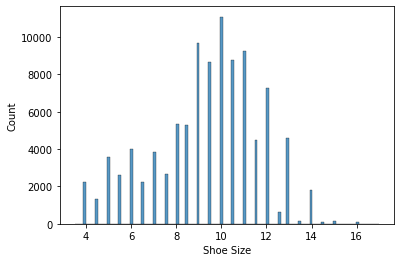

In [33]:
sns.histplot(df['Shoe Size']);

In [34]:
df['Buyer Region'].value_counts()

California              19349
New York                16525
Oregon                   7681
Florida                  6376
Texas                    5876
New Jersey               4720
Illinois                 3782
Pennsylvania             3109
Massachusetts            2903
Michigan                 2762
Virginia                 2058
Ohio                     1890
Maryland                 1870
Washington               1863
Georgia                  1846
Arizona                  1398
North Carolina           1344
Delaware                 1242
Connecticut              1110
Indiana                  1026
Colorado                  954
Wisconsin                 840
Nevada                    790
Tennessee                 731
Minnesota                 725
Missouri                  660
South Carolina            570
Louisiana                 537
Kentucky                  488
Iowa                      460
Alabama                   457
Utah                      450
Oklahoma                  412
Hawaii    

In [35]:
profit = df.groupby('Buyer Region')['Profit'].sum().sort_values(ascending=False)

In [36]:
prof = pd.DataFrame(profit)

In [37]:
most_prof = prof.head(20)

In [38]:
most_prof

,Profit
Buyer Region,
California,5251834
New York,3860727
Oregon,2023251
Florida,1516674
Texas,1216426
New Jersey,1134251
Illinois,831076
Pennsylvania,654021
Massachusetts,637640


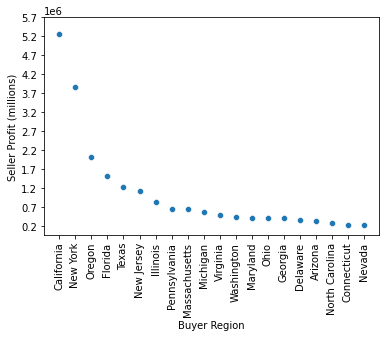

In [39]:
sns.scatterplot(x='Buyer Region', y='Profit', data=most_prof)
plt.xticks(rotation=90)
plt.yticks(np.arange(200000,6000000,500000))
plt.ylabel("Seller Profit (millions)")
plt.show()

In [40]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Shoe Type', 'Profit',
       'Profit Margin'],
      dtype='object')

In [41]:
shoe_prof = df.groupby('Shoe Type')['Profit'].sum().sort_values(ascending=False)

In [42]:
shoe_profit = pd.DataFrame(shoe_prof)

In [43]:
shoe_profit

,Profit
Shoe Type,
Yeezy Boost 350 V2,9725388
Off-White 1-Retro,4767895
Off-White Presto,2609372
Off-White Blazer,1712764
Off-White Air-Max,1612528
Off-White VaporMax,1359608
Off-White Force-1,840066
Off-White Zoom,632524
Yeezy Boost 350,388741


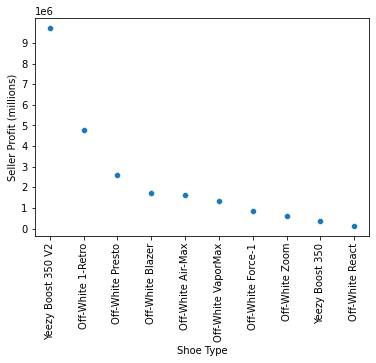

In [44]:
sns.scatterplot(x='Shoe Type', y='Profit', data=shoe_profit)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,10000000,1000000))
plt.ylabel("Seller Profit (millions)")
plt.show()